In [25]:
import yfinance as yf
from datetime import datetime, timedelta
from yahoo_fin import stock_info as si
import seaborn as sns
import matplotlib.pyplot as plt


# Diversification Analysis


In [26]:
stocks = ['TD.TO','AAPL','AON','AMD']
amounts = [26,270,141,265]
# getting live price from yahoo_fin, and from the values above we multiply to get the value of our portfolio 
values = [si.get_live_price(stocks[i]) *amounts[i] for i in range(len(stocks))] 

In [27]:
sectors = [yf.Ticker(x).get_info()['industry'] for x in stocks]
countries =[yf.Ticker(x).get_info()['country'] for x in stocks]
market_caps = [yf.Ticker(x).get_info()['marketCap'] for x in stocks]
etfs = ['XLU','VTI']
etf_amounts = [39,7]
etf_values = [si.get_live_price(etfs[i]) *etf_amounts[i] for i in range(len(etfs))] 

In [28]:
yf.Ticker('AON').get_info()['country']

'Ireland'

In [29]:
general_dist = {
    'Stocks' : sum(values),
    'ETFs':sum(etf_values)
}

In [30]:
sector_dist = {} #empty dict
for i in range(len(sectors)):
    if sectors[i] not in sector_dist.keys(): # see it for the first time we add it, if not 0-
        sector_dist[sectors[i]] = 0
    sector_dist[sectors[i]] +=values[i]
    

In [31]:
country_dist = {}
for i in range(len(countries)):
    if countries[i] not in country_dist.keys():
        country_dist[countries[i]] = 0
    country_dist[countries[i]] += values[i]

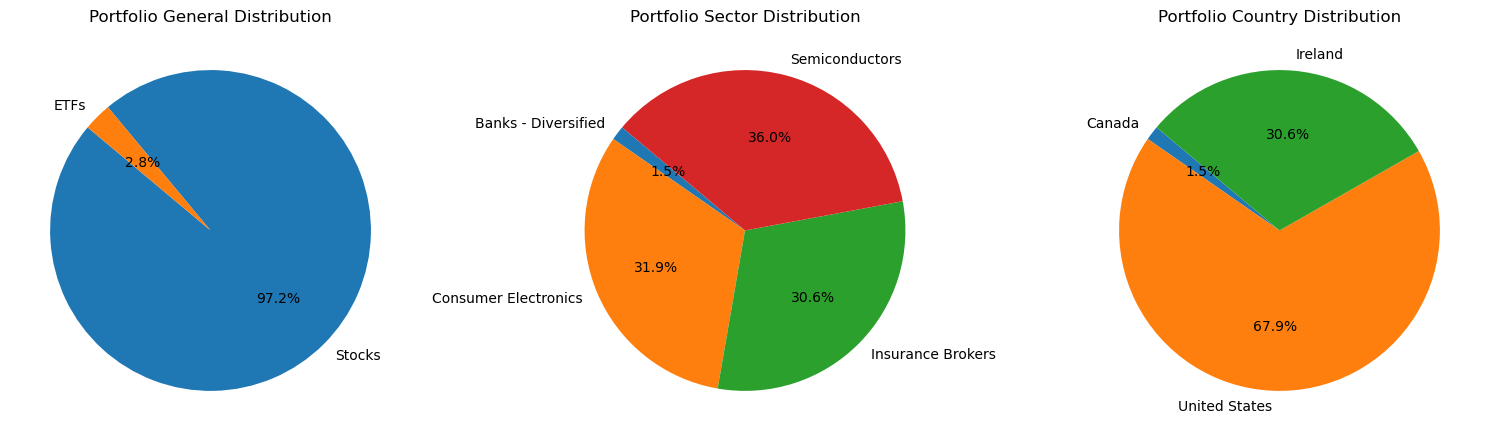

In [32]:
# Create pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Plot sector distribution
axes[0].pie(general_dist.values(), labels=general_dist.keys(), autopct='%1.1f%%', startangle=140)
axes[0].set_title('Portfolio General Distribution')


axes[1].pie(sector_dist.values(), labels=sector_dist.keys(), autopct='%1.1f%%', startangle=140)
axes[1].set_title('Portfolio Sector Distribution')

# Plot country distribution
axes[2].pie(country_dist.values(), labels=country_dist.keys(), autopct='%1.1f%%', startangle=140)
axes[2].set_title('Portfolio Country Distribution')

plt.tight_layout()
plt.show()